# Task 4.9 Part 1

## Step 3

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import os
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path to data folder
path = r'/Users/farhodfurkatov/Desktop/CF Data Immersion Achievment 4/Instacart Basket Analysis/02 Data'

In [4]:
# Importing Customer data set
customer = pd.read_csv(os.path.join(path, 'Original Data', 'customers.csv'), index_col = False)

In [18]:
# Checking the data
customer.head(100)

,user_id,first_name,last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374
...,...,...,...,...,...,...,...,...,...,...
95,86389,Stephen,Murillo,Male,Vermont,69,1/1/2017,3,married,66800
96,102956,Kathy,Mitchell,Female,Missouri,78,1/1/2017,1,married,96314
97,180919,Jacqueline,Roach,Female,Nebraska,21,1/1/2017,3,living with parents and siblings,56831
98,74155,Karen,Berg,Female,Alabama,33,1/1/2017,3,married,95285


In [6]:
customer.shape

(206209, 10)

In [8]:
customer.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


## Step 4

In [10]:
# I will rename the columns but wont be dropping any data 
#1. First Name to first_name 2. Surname to l_name

In [12]:
customer.rename(columns = {'First Name' : 'first_name'}, inplace = True)

In [13]:
customer.rename(columns = {'Surnam' : 'last_name'}, inplace = True)

In [14]:
customer.head()

,user_id,first_name,last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [15]:
# change user_id data type to string
customer['user_id'] = customer['user_id'].astype('str')

In [16]:
# check
customer.describe()

,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000
mean,49.501646,1.499823,94632.852548
std,18.480962,1.118433,42473.786988
min,18.000000,0.000000,25903.000000
25%,33.000000,0.000000,59874.000000
50%,49.000000,1.000000,93547.000000
75%,66.000000,3.000000,124244.000000
max,81.000000,3.000000,593901.000000


In [17]:
customer['user_id'].dtype

dtype('O')

## Step 5

In [26]:
# Checking Values
customer['fam_status'].value_counts(dropna = False)

married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: fam_status, dtype: int64

In [29]:
customer['STATE'].value_counts(dropna= False)

Connecticut             4044
Arkansas                4044
Georgia                 4044
Idaho                   4044
Iowa                    4044
Colorado                4044
Indiana                 4044
Florida                 4044
Delaware                4044
Hawaii                  4044
California              4044
District of Columbia    4044
Illinois                4044
Alabama                 4044
Arizona                 4044
Alaska                  4044
Utah                    4043
Rhode Island            4043
Michigan                4043
Washington              4043
West Virginia           4043
New Jersey              4043
Louisiana               4043
Ohio                    4043
Nebraska                4043
South Dakota            4043
Maryland                4043
Tennessee               4043
Massachusetts           4043
New York                4043
Oklahoma                4043
Virginia                4043
North Carolina          4043
South Carolina          4043
New Hampshire 

In [30]:
# Looking at State values it is strange that data almost equally distributed, I woulnt rely on this data to include 
# on my analysis

In [42]:
df_customer = customer.drop(columns = ['STATE'])

In [43]:
# further exploration on dependants
df_customer['n_dependants'].value_counts(dropna= False)

0    51602
3    51594
1    51531
2    51482
Name: n_dependants, dtype: int64

In [45]:
# further exploration on income
df_customer['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

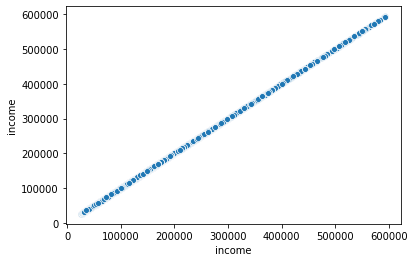

In [46]:
sns.scatterplot(x = 'income', y = 'income', data = df_customer)

In [35]:
# looks good here 

In [47]:
# We have a lot of missing first names, but it should affect our analysis
df_customer.isnull().sum()

user_id             0
first_name      11259
last_name           0
Gender              0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [49]:
#check for duplicates
df_dups = df_customer[df_customer.duplicated()]

In [50]:
df_dups

,user_id,first_name,last_name,Gender,Age,date_joined,n_dependants,fam_status,income


## Step 6

In [37]:
# import ords_prods data 
ords_prods = pd.read_pickle(os.path.join(path, 'Prepared Data', 'ords_prods_m.pkl'))

In [38]:
ords_prods.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,both,Mid-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer


In [48]:
# dropping _merge column
df_ords_prods = ords_prods.drop(columns = ['_merge'])

In [51]:
df_ords_prods.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,9.0,Mid-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer


In [53]:
# Making sure both user_id is Object
df_ords_prods['user_id'].dtype

dtype('int64')

In [54]:
df_ords_prods['user_id'] = df_ords_prods['user_id'].astype('str')

In [55]:
# I will merge orders and customer data on user_id
customer_ords = df_ords_prods.merge(df_customer, on = 'user_id', indicator = True)

In [57]:
customer_ords.shape

(32434212, 31)

In [58]:
pd.set_option('display.max_columns', None)

In [59]:
customer_ords.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag,first_name,last_name,Gender,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both


In [60]:
# dropping _merge column
customer_ords1 = customer_ords.drop(columns = ['_merge'])

In [61]:
customer_ords1.shape

(32434212, 30)

In [62]:
customer_ords.to_pickle(os.path.join(path, 'Prepared Data', 'customer_ords.pkl'))